In [16]:
from ts_iqae import *

In [17]:
data_dir = '/Volumes/ExDisk/Dropbox/BiggerWorkProjects/ChuckAllen-Florescence/'
file_df = read_structured_data(data_dir, 'data141110.txt')
print(file_df.shape)
file_df.sample(5)

(1685, 4)


,Image No.,Frame No,Time(hrs),path
1579,1629,1580,161.516306,/Volumes/ExDisk/Dropbox/BiggerWorkProjects/Chu...
684,734,685,72.016306,/Volumes/ExDisk/Dropbox/BiggerWorkProjects/Chu...
367,417,368,40.316306,/Volumes/ExDisk/Dropbox/BiggerWorkProjects/Chu...
66,114,67,10.222628,/Volumes/ExDisk/Dropbox/BiggerWorkProjects/Chu...
1156,1206,1157,119.216306,/Volumes/ExDisk/Dropbox/BiggerWorkProjects/Chu...


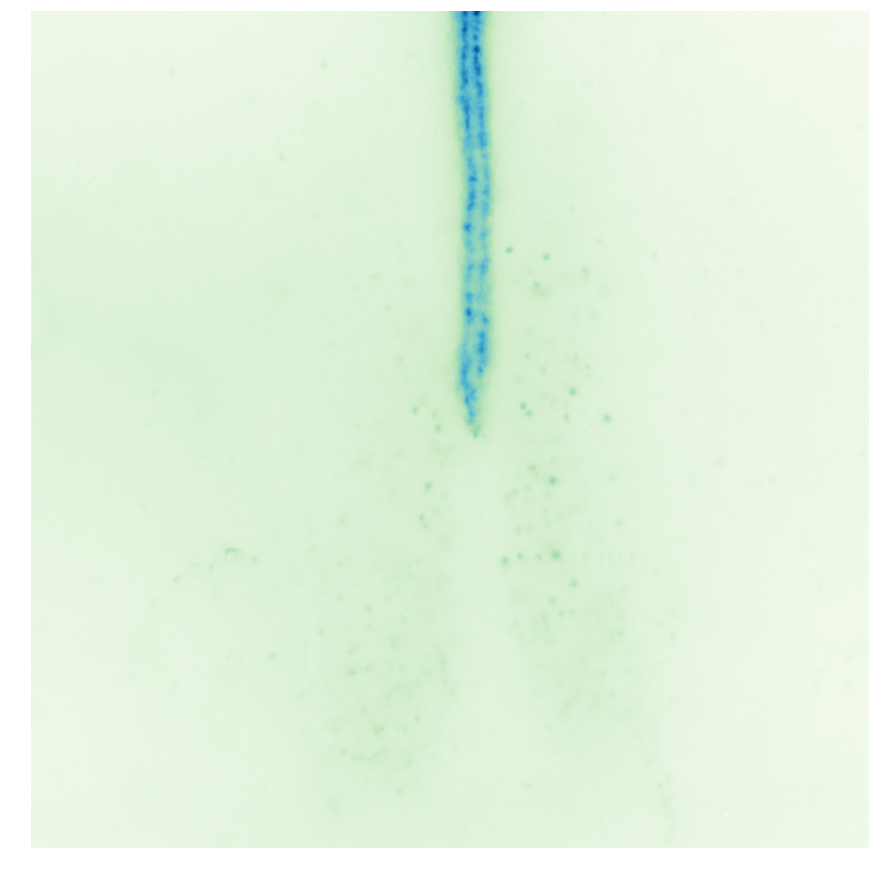

In [18]:
%matplotlib inline
@interact(time_step = (0,file_df.shape[0],1), continuous_update = False)
def cur_series(time_step):
    show_row_img(file_df, time_step)

In [19]:
time_axis, bt_stack = read_stack(sc, file_df.sample(200))
base_img = make_base_img(bt_stack)

In [20]:
bt_stack

NDArray
mode: 4Quant IQAE Engine
shape: (1685, 512, 512)

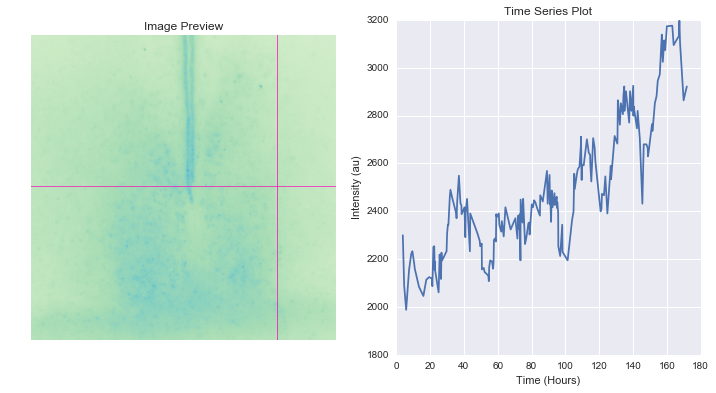

In [40]:
@interact(x_pos = (0,511, 1), y_pos = (0, 511, 1), continuous_update = False)
def cur_series(x_pos, y_pos):
    show_time_series(base_img, bt_stack, time_axis, y_pos, x_pos)

# Post Processing
## Concentration Information
Concentration / Activation information can be obtained from other sources and used for further analysis

In [22]:
conc_vec = extract_conc_vec(bt_stack)

## Partial Least Squares
A partial least squares analysis is run using 3 components to to try and fit the input data to the concentration vector

In [23]:
plsq_obj = PartialLSQ(3) 
fit_pls(plsq_obj, bt_stack, conc_vec)

## Representation
The representation of the spectra in the transformed space

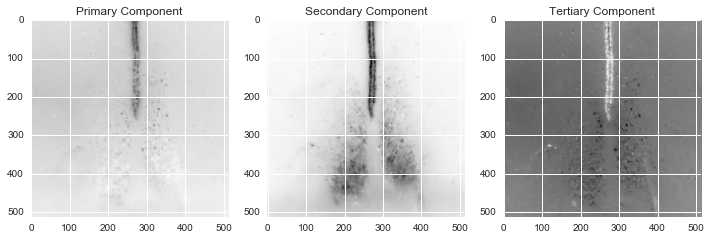

In [ ]:
pix_transform = transform_pls(plsq_obj, bt_stack)
im_transform = pix_transform.reshape((bt_stack.shape[1], bt_stack.shape[2], 3))
fig, (ax1, ax2, ax3) = plt.subplots(1,3 , figsize = (12, 6))
ax1.imshow(im_transform[:,:,0])
ax1.set_title('Primary Component')
ax2.imshow(im_transform[:,:,1])
ax2.set_title('Secondary Component')
ax3.imshow(im_transform[:,:,2])
ax3.set_title('Tertiary Component')

## Fit components
The output of the full fit (based on the 3 components) can then be represented for the datasets as follows

In [27]:
pix_pred = predict_pls(plsq_obj, bt_stack)

(-0.5, 511.5, 511.5, -0.5)

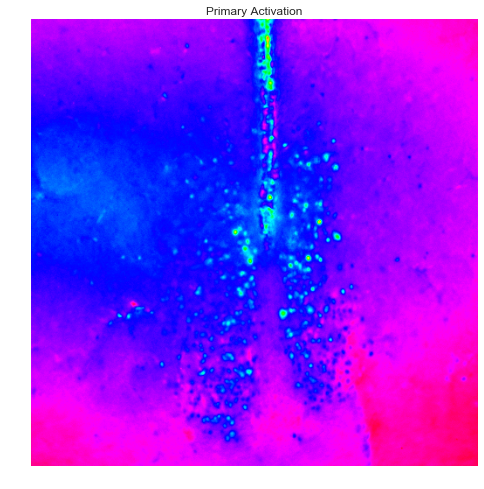

In [28]:
im_pred = pix_pred.reshape((bt_stack.shape[1], bt_stack.shape[2], 1))
fig, (ax1) = plt.subplots(1,1 , figsize = (8, 8))
ax1.imshow(im_pred[:,:,0], cmap = plt.cm.hsv)
ax1.set_title('Primary Activation')
ax1.axis('off')

In [31]:
sqlContext.createDataFrame(file_df).registerTempTable('MeasurementData')
sqlContext.sql("SELECT 'Image No.' as ImNo, path FROM MeasurementData WHERE 'Time(hrs)'>0")

DataFrame[ImNo: string, path: string]

In [38]:
stat_query = sqlContext.sql("SELECT time, MAX(intensity) as MeanIntensity,MAX(intensity) as MaxIntensity, COUNT(*) as Total FROM AllMeasurementData GROUP BY time")

In [39]:
stat_query.take(5)

Py4JJavaError: An error occurred while calling z:org.apache.spark.sql.execution.python.EvaluatePython.takeAndServe.
: org.apache.spark.SparkException: Job 59 cancelled because Stage 143 was cancelled
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1450)
	at org.apache.spark.scheduler.DAGScheduler.handleJobCancellation(DAGScheduler.scala:1389)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleStageCancellation$1.apply$mcVI$sp(DAGScheduler.scala:1377)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleStageCancellation$1.apply(DAGScheduler.scala:1376)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleStageCancellation$1.apply(DAGScheduler.scala:1376)
	at scala.collection.IndexedSeqOptimized$class.foreach(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofInt.foreach(ArrayOps.scala:234)
	at org.apache.spark.scheduler.DAGScheduler.handleStageCancellation(DAGScheduler.scala:1376)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1632)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1618)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1607)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:632)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1871)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1884)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1897)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:347)
	at org.apache.spark.sql.execution.python.EvaluatePython$$anonfun$takeAndServe$1.apply$mcI$sp(EvaluatePython.scala:41)
	at org.apache.spark.sql.execution.python.EvaluatePython$$anonfun$takeAndServe$1.apply(EvaluatePython.scala:39)
	at org.apache.spark.sql.execution.python.EvaluatePython$$anonfun$takeAndServe$1.apply(EvaluatePython.scala:39)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:57)
	at org.apache.spark.sql.Dataset.withNewExecutionId(Dataset.scala:2532)
	at org.apache.spark.sql.execution.python.EvaluatePython$.takeAndServe(EvaluatePython.scala:39)
	at org.apache.spark.sql.execution.python.EvaluatePython.takeAndServe(EvaluatePython.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:497)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:128)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:211)
	at java.lang.Thread.run(Thread.java:745)


In [ ]:
bt_stack.tordd().flatMapValues(lambda x: x.flatten()).map(lambda (k,v): {'time': k, 'intensity': int(v)}).toDF().registerTempTable('AllMeasurementData')